###  Required Setup
    1. create virtual environment in jupyter env
    2. install kernel in virtual environment created
    3. install required modules/packages

### References

**MarkUp:**

    1. https://www.tutorialspoint.com/jupyter/jupyter_notebook_markdown_cells.htm
    
    2. https://www.earthdatascience.org/courses/intro-to-earth-data-science/file-formats/use-text-files/format-text-with-markdown-jupyter-notebook/
    
    3. https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html
 
 **Setup**
 
    1. https://conda.io/projects/conda/en/latest/user-guide/tasks/manage-environments.html#specifying-a-location-for-an-environment
     
    2. https://janakiev.com/blog/jupyter-virtual-envs/
     
    3. https://www.geeksforgeeks.org/using-jupyter-notebook-in-virtual-environment/
 
 **GitHub**
 
     1. https://docs.github.com/en/get-started/quickstart/hello-world
     
     2. https://reproducible-science-curriculum.github.io/sharing-RR-Jupyter/01-sharing-github/
     
     3. https://www.geeksforgeeks.org/how-to-upload-project-on-github-from-jupyter-notebook/

###  import required python modules

In [41]:
import yfinance as yf
from qtrade import Questrade

import pandas as pd
import numpy as np

import xlrd
import xlsxwriter

import math
import time
from time import sleep
import schedule

import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import mplfinance as mpf

###  function for single stock volume frequency tracker indicator(not in use)

In [42]:
def onestock():
    Ticker = input('Enter ticker for information: ')
    data12 = yf.download(Ticker, start="2021-09-17", end="2021-11-12", interval="5m", prepost=True)
    Volume1 = data12.Volume
    Close = data12.Close

    A = Volume1[(Volume1 >= 15000) & (Volume1 < 50000)]
    B = Volume1[(Volume1 >= 80000) & (Volume1 < 300000)]
    C = Volume1[(Volume1 >= 1000000)]
    D = Volume1[(Volume1 >= 5000000)]

    fifteenfifty = A.count()
    eightythreehund = B.count()
    onemill = C.count()
    fivemill = D.count()

    print_data_demacator = '*****************************************************************'

    # print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>REPORT SUMMARY>>>>>>>>>>>>>>>>>>>>>>>>>>")

    # print('>>>>>>>>>>>>>>>>>>>>>>>>>>>>>|15k-50k --A|>>>>>>>>>>>>>>>>>>>>>>>>>>>>')
    # print('I.',fifteenfifty)
    # print('>>>>>>>>>>>>>>>>>>>>>>>>>>>>>|80k-300k--B|>>>>>>>>>>>>>>>>>>>>>>>>>>>>')
    # print('II.',eightythreehund)
    # print('>>>>>>>>>>>>>>>>>>>>>>>>>>>>>|1Million--C|>>>>>>>>>>>>>>>>>>>>>>>>>>>>')
    # print('>>>>>>>>>>>>>>>>>>>>>>>>>>>>>|5Million--D|>>>>>>>>>>>>>>>>>>>>>>>>>>>>')
    # print('IV.',fivemill)
    # print('>>>>>>>>>>>>>>>>>>>>>>>>>>>>>| ALL DONE  |>>>>>>>>>>>>>>>>>>>>>>>>>>>>')

    with pd.ExcelWriter('C:/Users/dows/Desktop/criteria1.xlsx') as writer:
        fifteenfifty.to_excel(writer, sheet_name='15k', index=True)
        eightythreehund.to_excel(writer, sheet_name='80k', index=True)
        onemill.to_excel(writer, sheet_name='1milla', index=True)
        fivemill.to_excel(writer, sheet_name='5milla', index=True)
        B.to_excel(writer, sheet_name='80to300', index=False)
        C.to_excel(writer, sheet_name='1m', index=False)
        D.to_excel(writer, sheet_name='5m', index=False)


# onestock()

###   function for average down analysis indicator(not in use)

In [43]:
def average_down():
    print("****************************************************************************")
    print("*********************AVERAGING DOWN QTY FINDER******************************")
    Share_ticker = input("Enter Ticker: ")
    Shares_qty_purchased = int(input("Enter Shares quantity bought:"))
    Shares_Cost = int(input("Enter Total Cost bought: "))
    Current_Shares_price = int(input("Current share price:"))
    Newshares_to_purchase = (Shares_Cost / Current_Shares_price) - (Shares_qty_purchased)
    print("Number of shares to buy to average down is", Newshares_to_purchase)
    print("****************************************************************************")
# average_down()

###   function for pre-post market trader(not in use)

###    function to get single ticker info from yfinance

In [44]:
def df_single_get(ticker):  # function used to get single dataframe for a single ticker
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)

    # download pre/post regular market hours data
    # (optional, default is False) prepost=False
    df = yf.download(  # or pdr.get_data_yahoo(...
        # tickers list or string as well
        ticker,

        # use "period" instead of start/end
        # valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
        # (optional, default is '1mo')
        period="6mo",
        # start="2021-03-01",
        # end="2021-11-13",

        # fetch data by interval (including intraday if period < 60 days)
        # valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
        # (optional, default is '1d')
        interval="1h",

        # group by ticker (to access via data['SPY'])
        # (optional, default is 'column')
        # group_by='ticker',

        # adjust all OHLC automatically
        # (optional, default is False)
        # auto_adjust=True,

        # download pre/post regular market hours data
        # (optional, default is False)
        prepost=True,

        # use threads for mass downloading? (True/False/Integer)
        # (optional, default is True)
        threads=True,

        # proxy URL scheme use use when downloading?
        # (optional, default is None)
        # proxy=None
    )

    df.insert(0, 'Ticker', ticker, True)
    return df

###   class created to handle multiple outputs in one object

In [45]:
# A Python program to return multiple 
# values from a method using class
class GetBollingerData:
    def __init__(self, ML, SD, Dframe):
        self.ML = ML
        self.SD = SD  
        self.df = Dframe
  
# This function returns an object of Test
#def fun():
#    return GetBollingerData()
#      
## Driver code to test above method
#t = fun() 
#print(t.str)
#print(t.x)

###   function for adding bollinger bands data

In [46]:
def df_add_bollinger_data(df):  
    # Calculate the 20 moving averages and std of the adjusted closing prices
    ML = df['Adj Close'].rolling(window=20).mean()
    SD = df['Adj Close'].rolling(window=20).std()
    # Range= (df['High']-df['Low'])/df['Low']

    UL = [ML + (SD * 2)]
    LL = [ML - (SD * 2)]
    Buy = (df['Adj Close'] - (df['Adj Close'].rolling(window=20).mean()) - (SD * 2))
    Sell = (df['Adj Close'] - (df['Adj Close'].rolling(window=20).mean()) + (SD * 2))
    tTrend = df['Adj Close'] > df['Adj Close'].rolling(window=20).mean()

    df['Buy'] = pd.Series(Buy)
    df['Sell'] = pd.Series(Sell)
    df['Market-Trend'] = pd.Series(tTrend)
    df['Market-Trend'] = df['Market-Trend'].map({True: "Bullish", False:"Bearish"})

    Long = df.apply(buy_conditions, axis=1)
    Short = df.apply(sell_conditions, axis=1)
    #mktrend = df.apply(trend_conditions, axis=1)
    # Flow=df.apply(trend,axis=0)

    if not df.empty:
        df.insert(8, 'Long', Long, allow_duplicates=True)
        df.insert(9, 'Short', Short, allow_duplicates=True)
    
    data = GetBollingerData(ML, SD, df)
    
    return data

###   functions for checking buy/sell conditions

In [47]:
def buy_conditions(df):
    if (df['Buy'] >= 0):
        return 'BUY CALL'
    else:
        return 'BUY PUT'


def sell_conditions(df):
    if (df['Sell'] <= 0):
        return 'BUY PUT'
    else:
        return 'BUY CALL'

###   function for volatilty

In [48]:
def volatility_conditions(df):    
    Alength = 0
    effectiveLen = math.ceil((Alength + 1)/2)
    df['volatile'] = df['High'] + df['Open'] + df['Low'] + df['Close']
    df['volatile'] = np.tan(df['volatile'].astype(float))
    return df

###   Plot everything using matplotlib and seaborn

In [49]:
def graphplot(ML,df):
    #xpoints = np.array([1, 2, 6, 8])
    ypoints = df['volatile']

    # Plot everything by leveraging the very powerful matplotlib package

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 15))
    ax1.plot(ML.index, ML, label='Closing Price')
    ax2.plot(ypoints.index, ypoints, label='Volatility')

    my_year_month_fmt = mdates.DateFormatter('%m/%y')
    ax1.xaxis.set_major_formatter(my_year_month_fmt)
    ax2.xaxis.set_major_formatter(my_year_month_fmt)

    ax1.set_xlabel('Date-Time')
    ax1.set_ylabel('Adjusted closing price ($)')
    ax1.legend()


    ax2.set_xlabel('Date-Time')
    ax2.set_ylabel('Volatility')
    ax2.legend()
    plt.show()

###   main call for program

In [50]:
def main():
    df = df_single_get('iwm')
    
    bolldata = df_add_bollinger_data(df)
    ML = bolldata.ML
    SD = bolldata.SD
    df = bolldata.df
    
    df = volatility_conditions(df)    
    
    print(df.head(10))

In [51]:
if __name__ == "__main__":
    main()
    
    

[*********************100%***********************]  1 of 1 completed
                          Ticker        Open        High         Low  \
2021-05-27 04:00:00-04:00    iwm  223.200000  223.200000  223.110000   
2021-05-27 05:00:00-04:00    iwm  223.060000  223.060000  222.650000   
2021-05-27 06:00:00-04:00    iwm  222.840000  223.000000  222.720000   
2021-05-27 07:00:00-04:00    iwm  222.900000  223.240000  222.900000   
2021-05-27 08:00:00-04:00    iwm  223.190000  224.450000  222.950000   
2021-05-27 09:00:00-04:00    iwm  223.750000  225.100000  223.350000   
2021-05-27 09:30:00-04:00    iwm  225.039993  225.697800  224.179993   
2021-05-27 10:30:00-04:00    iwm  225.589996  225.720001  224.740005   
2021-05-27 11:30:00-04:00    iwm  225.259995  225.649994  225.070007   
2021-05-27 12:30:00-04:00    iwm  225.460007  225.809998  225.440002   

                                Close   Adj Close   Volume  Buy     Long  \
2021-05-27 04:00:00-04:00  223.150000  223.150000        0  Na

Plot Graph

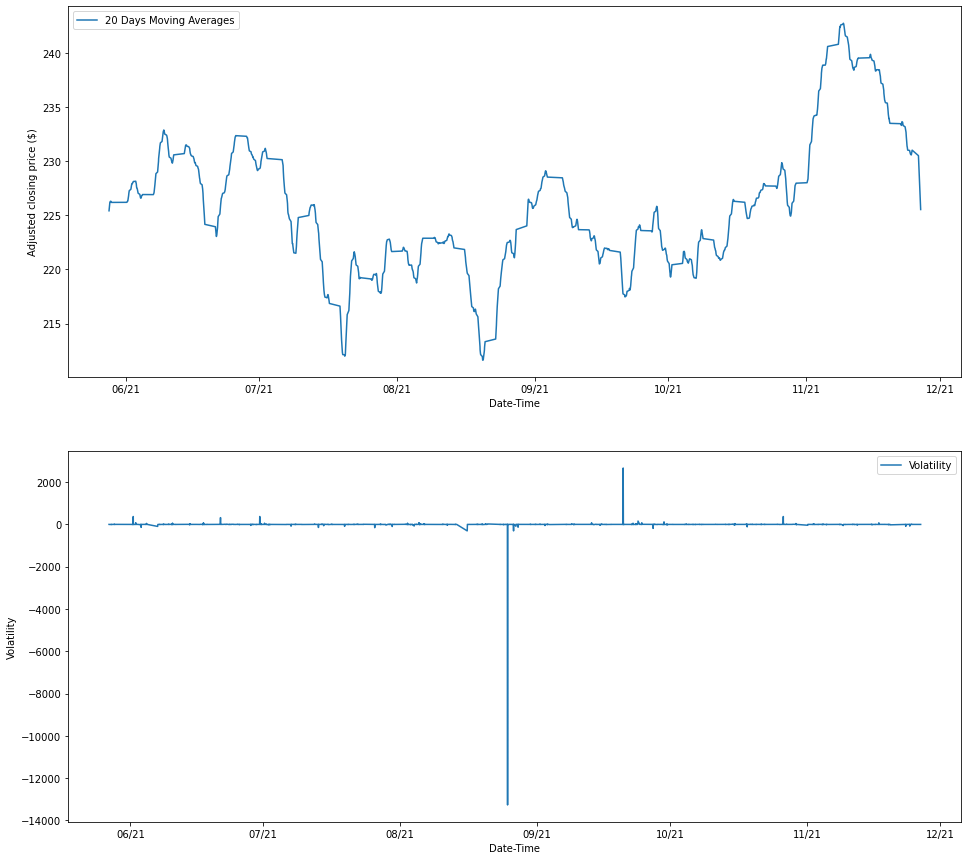

In [52]:
    graphplot(ML,df)